## A moving average crossover trading strategy

### Introduction

In this analysis, I will backtest a moving average crossover trading strategy using historical data for NVIDIA Corporation (NVDA) from July 25, 2023, to July 25, 2024. Backtesting is an essential process that allows traders to evaluate the effectiveness of a trading strategy using past market data.

The strategy employs two moving averages: a short-term moving average (50-day) and a long-term moving average (200-day). By analyzing the crossover points of these moving averages, we can generate buy and sell signals. A buy signal is produced when the short-term moving average crosses above the long-term moving average, indicating a potential uptrend. Conversely, a sell signal occurs when the short-term moving average crosses below the long-term moving average, suggesting a downtrend.

The results of this strategy will be visualized through a plot that displays the closing prices of NVDA, the moving averages, and the buy and sell signals. This visualization will help assess the strategy's performance during the specified time period, enabling traders to make informed decisions based on historical trends.

### Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Historical Data

In [34]:
data = pd.read_csv('NVDA.csv')  # Ensure to have a CSV file with 'Date' and 'Close' columns
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

### Data Cleaning

In [41]:
# Check for missing values
print(data.isnull().sum())

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Short_MA      49
Long_MA      199
Signal         0
Position       1
dtype: int64


### Handle missing values

In [42]:
data['Short_MA'].fillna(method='bfill', inplace=True)  # Backfill 
data['Long_MA'].fillna(method='bfill', inplace=True)

In [43]:
data['Position'].fillna(0, inplace=True)  # Fill NaN with 0

### Define Moving Averages

In [44]:
short_window = 50
long_window = 200

data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

### Generate Trading Signals

In [45]:
data['Signal'] = 0
data.iloc[short_window:, data.columns.get_loc('Signal')] = np.where(
    data['Short_MA'].iloc[short_window:] > data['Long_MA'].iloc[short_window:], 
    1, 
    0
)
data['Position'] = data['Signal'].diff()

### Plot Results

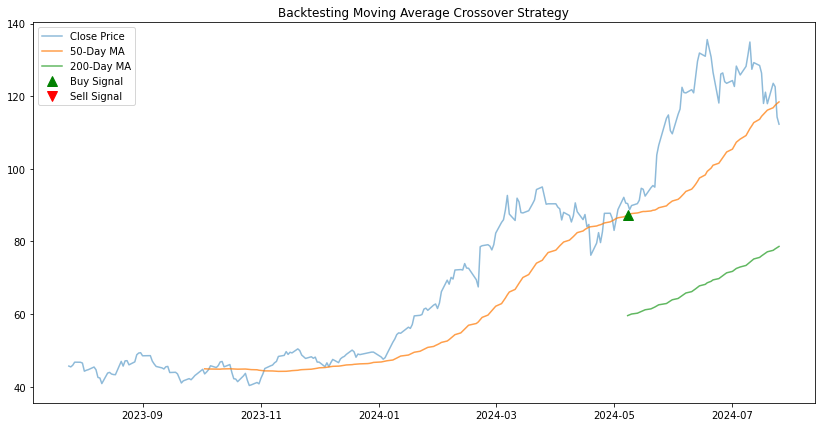

In [46]:
# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Short_MA'], label='50-Day MA', alpha=0.75)
plt.plot(data['Long_MA'], label='200-Day MA', alpha=0.75)

# Buy signals
plt.plot(data[data['Position'] == 1].index, 
         data['Short_MA'][data['Position'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')

# Sell signals
plt.plot(data[data['Position'] == -1].index, 
         data['Short_MA'][data['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Backtesting Moving Average Crossover Strategy')
plt.legend()
plt.show()

## Conclusion

- **Trend Following**: The strategy effectively captures the upward trend by generating buy signals during the bullish phase and potentially avoiding losses during bearish phases.

- **Signal Timing**: The buy signals appear to align with significant price increases, suggesting that the strategy could have been profitable during the tested period. Conversely, the sell signals indicate points where the strategy would have exited positions.

- **Risk Management**: While the strategy shows promise, it's essential to consider market conditions and incorporate risk management techniques to handle potential downturns.

- **Further Analysis**: Additional metrics like drawdown, Sharpe ratio, and comparison against a benchmark can provide deeper insights into the strategy's performance.